In [1]:
using Arpack
using LinearAlgebra
using CairoMakie
using LaTeXStrings
using Revise
using Interpolations
using Roots
using ColorSchemes
using Colors
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Spinors/rmg_K.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Lattice_setup/lattice_BZ.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/patch_methods.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/rmg_3pV.jl")

rmg_inf_layer_alpha (generic function with 1 method)

In [2]:
function find_intersections(x1, y1, x2, y2)
    # Create interpolants (use linear or cubic splines)
    itp1 = LinearInterpolation(x1, y1)
    itp2 = LinearInterpolation(x2, y2)

    # Define the function whose roots we seek: f(x) = y1(x) - y2(x)
    function diff(x)
        return itp1(x) - itp2(x)
    end

    # Find the common x-range
    x_min = max(minimum(x1), minimum(x2))
    x_max = min(maximum(x1), maximum(x2))

    # Find roots in the common range
    intersections = find_zeros(diff, x_min, x_max)

    # Get corresponding y values
    intersection_points = Array{Float64}(undef, length(intersections), 2)
    for j in 1:length(intersections)
        x = intersections[j]
        intersection_points[j, 1] = x
        intersection_points[j, 2] = itp1(x)
    end

    return intersection_points
end

find_intersections (generic function with 1 method)

In [3]:
function explicit_og_bc_vF(delta, alpha, index, vF)
    omega = exp(im * 2 * pi/ 3)
    k = index - 1
    v = vF
    
    nmz = 16 * real(omega^k * delta)^4 + 3 * abs(delta)^4 + 8 * real(delta^3) * real(omega^k * delta)
    
    return ((8 * sqrt(3) / nmz^2) * (8 * v * real(omega^k * delta)^3 - 12 * real(alpha * conj(delta)) * real(omega^k * delta)^2 + 
    3 * abs2(delta) * real(alpha * conj(delta)) + v * real(delta^3)) * (4 * real(omega^k * delta)^2 * imag(alpha * conj(delta)) + 
    4 * real(omega^k * delta) * imag(alpha * delta^2) - v * imag(delta^3) + abs2(delta) * imag(alpha * conj(delta))))
    
end

explicit_og_bc_vF (generic function with 1 method)

In [4]:
# general parameters
pd = 50
mbz_kappa = 1
w = 10^(-1) * mbz_kappa
omega = exp(im * 2 * pi / 3)

-0.4999999999999998 + 0.8660254037844387im

## Comparison between pure 3-patch and total 3-patch in small $\nu$ regime

In [33]:
function rmg_ratio_check(Nl_list, m_kappa, vF, w, pd, nu_llm, nu_ulm)
    nu_pts = 10^2
    nu_list = range(nu_llm, nu_ulm, nu_pts)
    ratio = Array{Float64}(undef, nu_pts)
    spacing = 10^(-2) * (w / 2 / pd)

    P = Figure(size=(1800, 2000), fontsize=30)

    for j in 1:length(Nl_list)
        Nl = Nl_list[j]
        for i in 1:nu_pts
            nu = nu_list[i]
            delta = rmg_delta_all(m_kappa, nu, Nl)
            alpha = rmg_alpha_all(m_kappa, nu, Nl)
            grid = reshape([10^(-16), 10^(-16)], (1, 2))
            c1 = bc_no_spinors(grid, spacing, vF, delta, alpha)[1]
            c2 = rmg_patch_bc(grid, spacing, Nl, nu, m_kappa, vF, delta, alpha)[1]
            
            ratio[i] = c1/c2
        end
        ax1 = Axis(P[j, 1], title = "N_L = "*string(Nl), xlabel = L"\nu", ylabel = L"\Omega")
        lines!(ax1, nu_list, ratio, label = "3-Patch")
        # P[j, 2] = Legend(P, ax1, framevisible = true)
    end
    axs1 = Axis(P[:, 1], title = L"\frac{\tilde{\Omega}}{\Omega^{\text{3p}}}", titlegap = 100, titlesize = 80)
    hidedecorations!(axs1, label = false)
    hidespines!(axs1)

    P
end

rmg_ratio_check (generic function with 1 method)

In [7]:
NL_list = [3, 4, 5]
vF = 0.01
mbz_kappa = 1

1

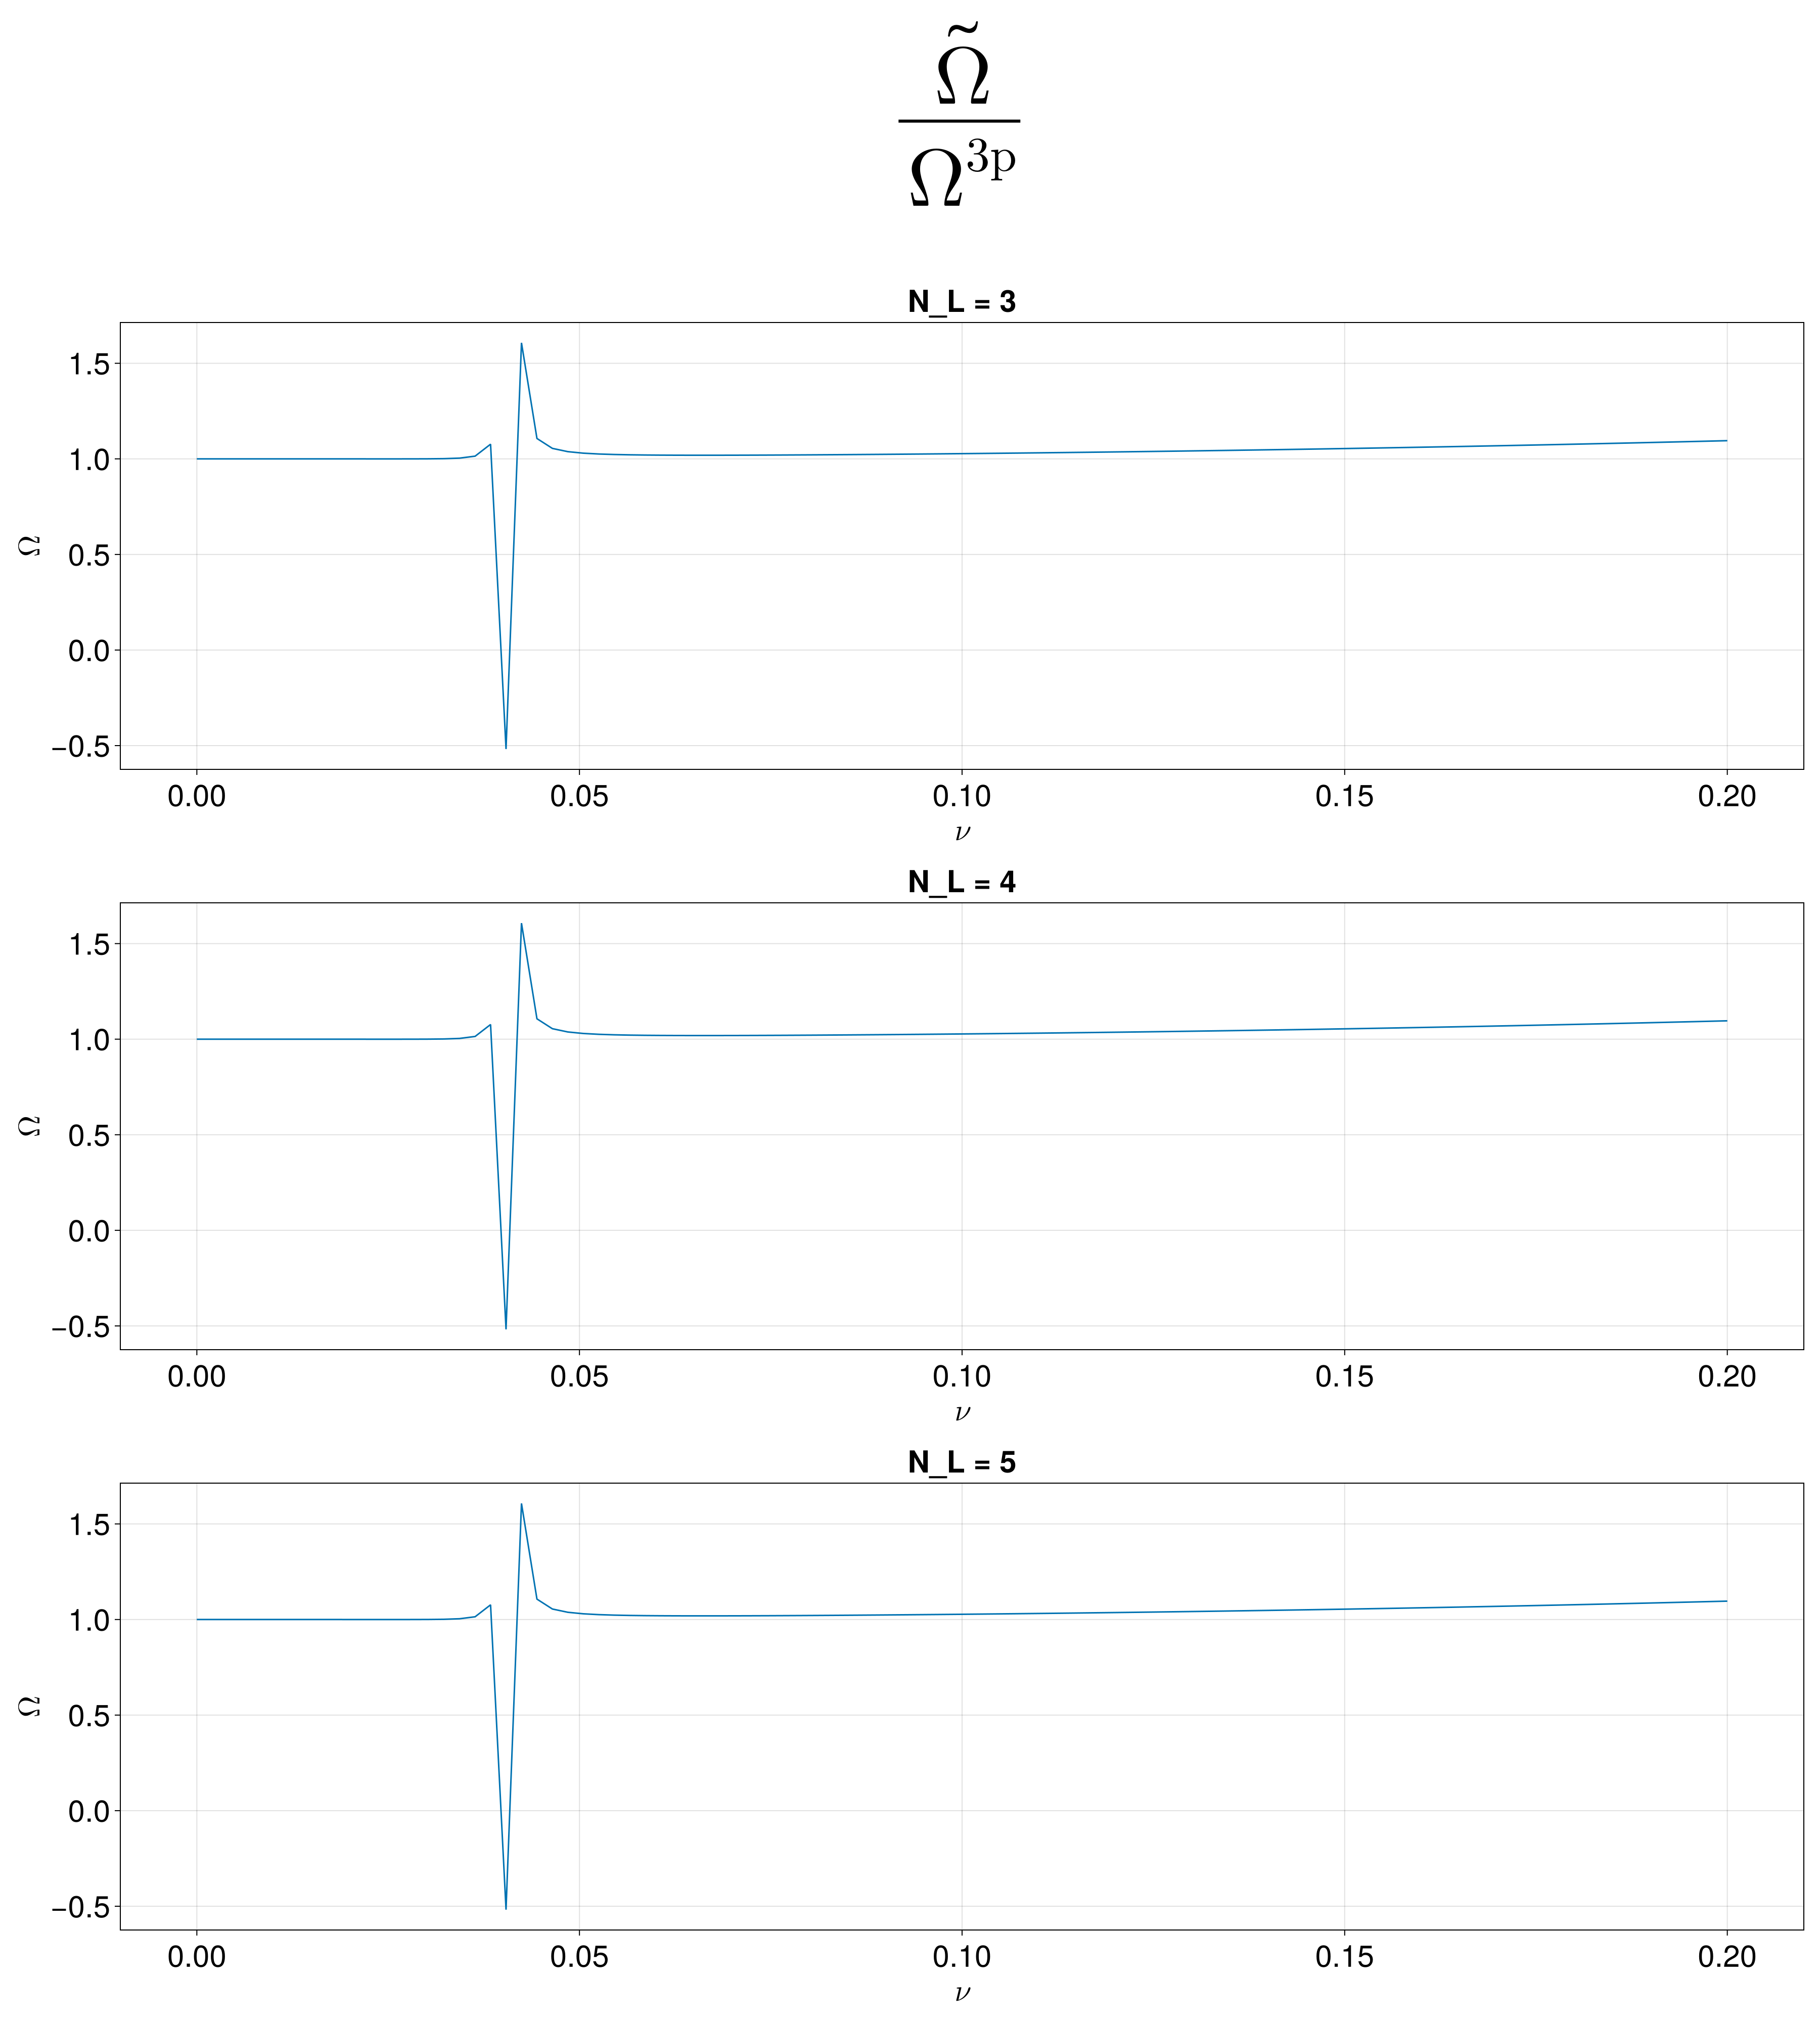

In [35]:
rmg_ratio_check(NL_list, mbz_kappa, vF, w, pd, 0.00, 0.2)

In [49]:
function rmg_rel_error_check(Nl_list, m_kappa, vF, w, pd, nu_llm, nu_ulm)
    nu_pts = 10^2
    nu_list = range(nu_llm, nu_ulm, nu_pts)
    ratio = Array{Float64}(undef, nu_pts)
    spacing = 10^(-2) * (w / 2 / pd)

    P = Figure(size=(1800, 2000), fontsize=30)

    for j in 1:length(Nl_list)
        Nl = Nl_list[j]
        for i in 1:nu_pts
            nu = nu_list[i]
            delta = rmg_delta_all(m_kappa, nu, Nl)
            alpha = rmg_alpha_all(m_kappa, nu, Nl)
            grid = reshape([10^(-16), 10^(-16)], (1, 2))
            c1 = bc_no_spinors(grid, spacing, vF, delta, alpha)[1]
            c2 = rmg_patch_bc(grid, spacing, Nl, nu, m_kappa, vF, delta, alpha)[1]
            
            ratio[i] = log10(abs((c1 - c2)/c2))
        end
        ax1 = Axis(P[j, 1], title = "N_L = "*string(Nl), xlabel = L"\nu", ylabel = L"\Omega")
        lines!(ax1, nu_list, ratio, label = "3-Patch")
        # P[j, 2] = Legend(P, ax1, framevisible = true)
    end
    axs1 = Axis(P[:, 1], title = L"\log_{10} (\delta \tilde{\Omega})", titlegap = 100, titlesize = 80)
    hidedecorations!(axs1, label = false)
    hidespines!(axs1)

    P
end

rmg_rel_error_check (generic function with 1 method)

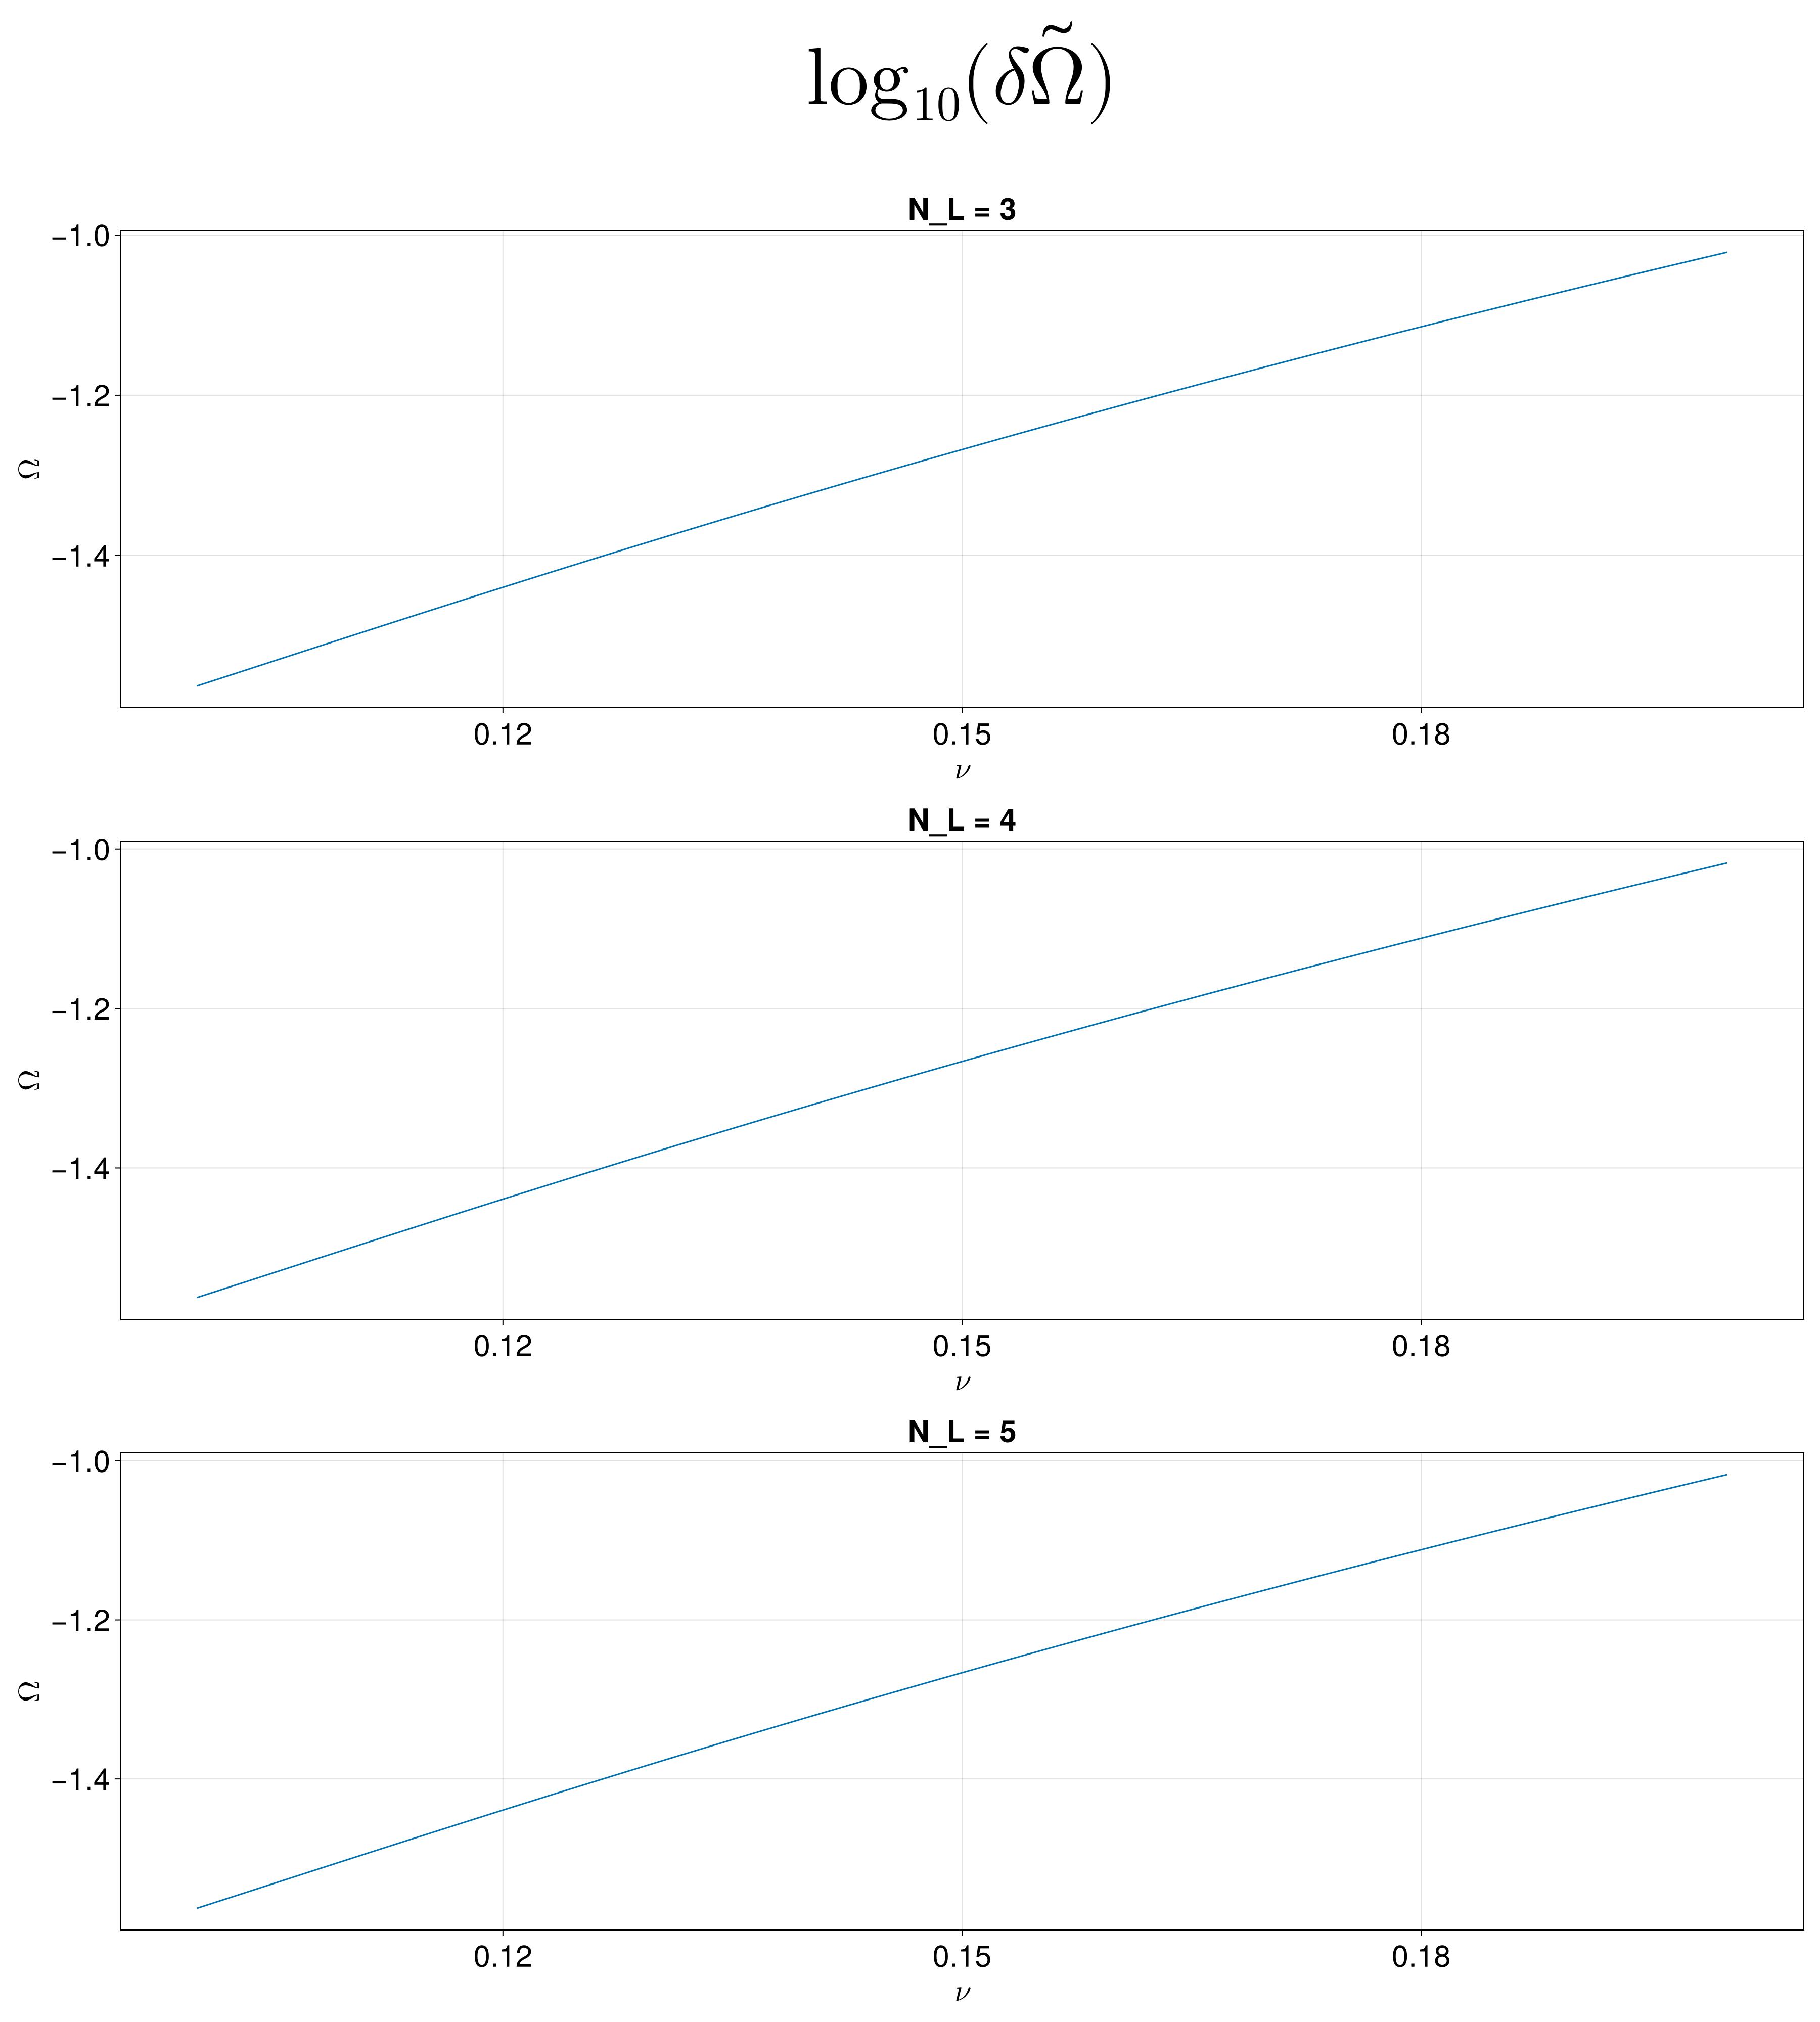

In [50]:
rmg_rel_error_check(NL_list, mbz_kappa, vF, w, pd, 0.1, 0.2)

In [130]:
function rmg_diff_check(Nl_list, m_kappa, vF, w, pd, nu_llm, nu_ulm)
    nu_pts = 10^2
    nu_list = range(nu_llm, nu_ulm, nu_pts)
    ratio = Array{Float64}(undef, nu_pts)
    spacing = 10^(-2) * (w / 2 / pd)

    P = Figure(size=(1800, 2000), fontsize=30)

    for j in 1:length(Nl_list)
        Nl = Nl_list[j]
        for i in 1:nu_pts
            nu = nu_list[i]
            delta = rmg_delta_all(m_kappa, nu, Nl)
            alpha = rmg_alpha_all(m_kappa, nu, Nl)
            grid = reshape([10^(-16), 10^(-16)], (1, 2))
            c1 = bc_no_spinors(grid, spacing, vF, delta, alpha)[1]
            c2 = rmg_patch_bc(grid, spacing, Nl, nu, m_kappa, vF, delta, alpha)[1]
            
            ratio[i] = c1 - c2
        end
        ax1 = Axis(P[j, 1], title = "N_L = "*string(Nl), xlabel = L"\nu", ylabel = L"\Omega")
        lines!(ax1, nu_list, ratio, label = "3-Patch")
        # P[j, 2] = Legend(P, ax1, framevisible = true)
    end
    axs1 = Axis(P[:, 1], title = L"\tilde{\Omega} - \Omega^{\text{3p}}", titlegap = 100, titlesize = 80)
    hidedecorations!(axs1, label = false)
    hidespines!(axs1)

    P
end

rmg_diff_check (generic function with 1 method)

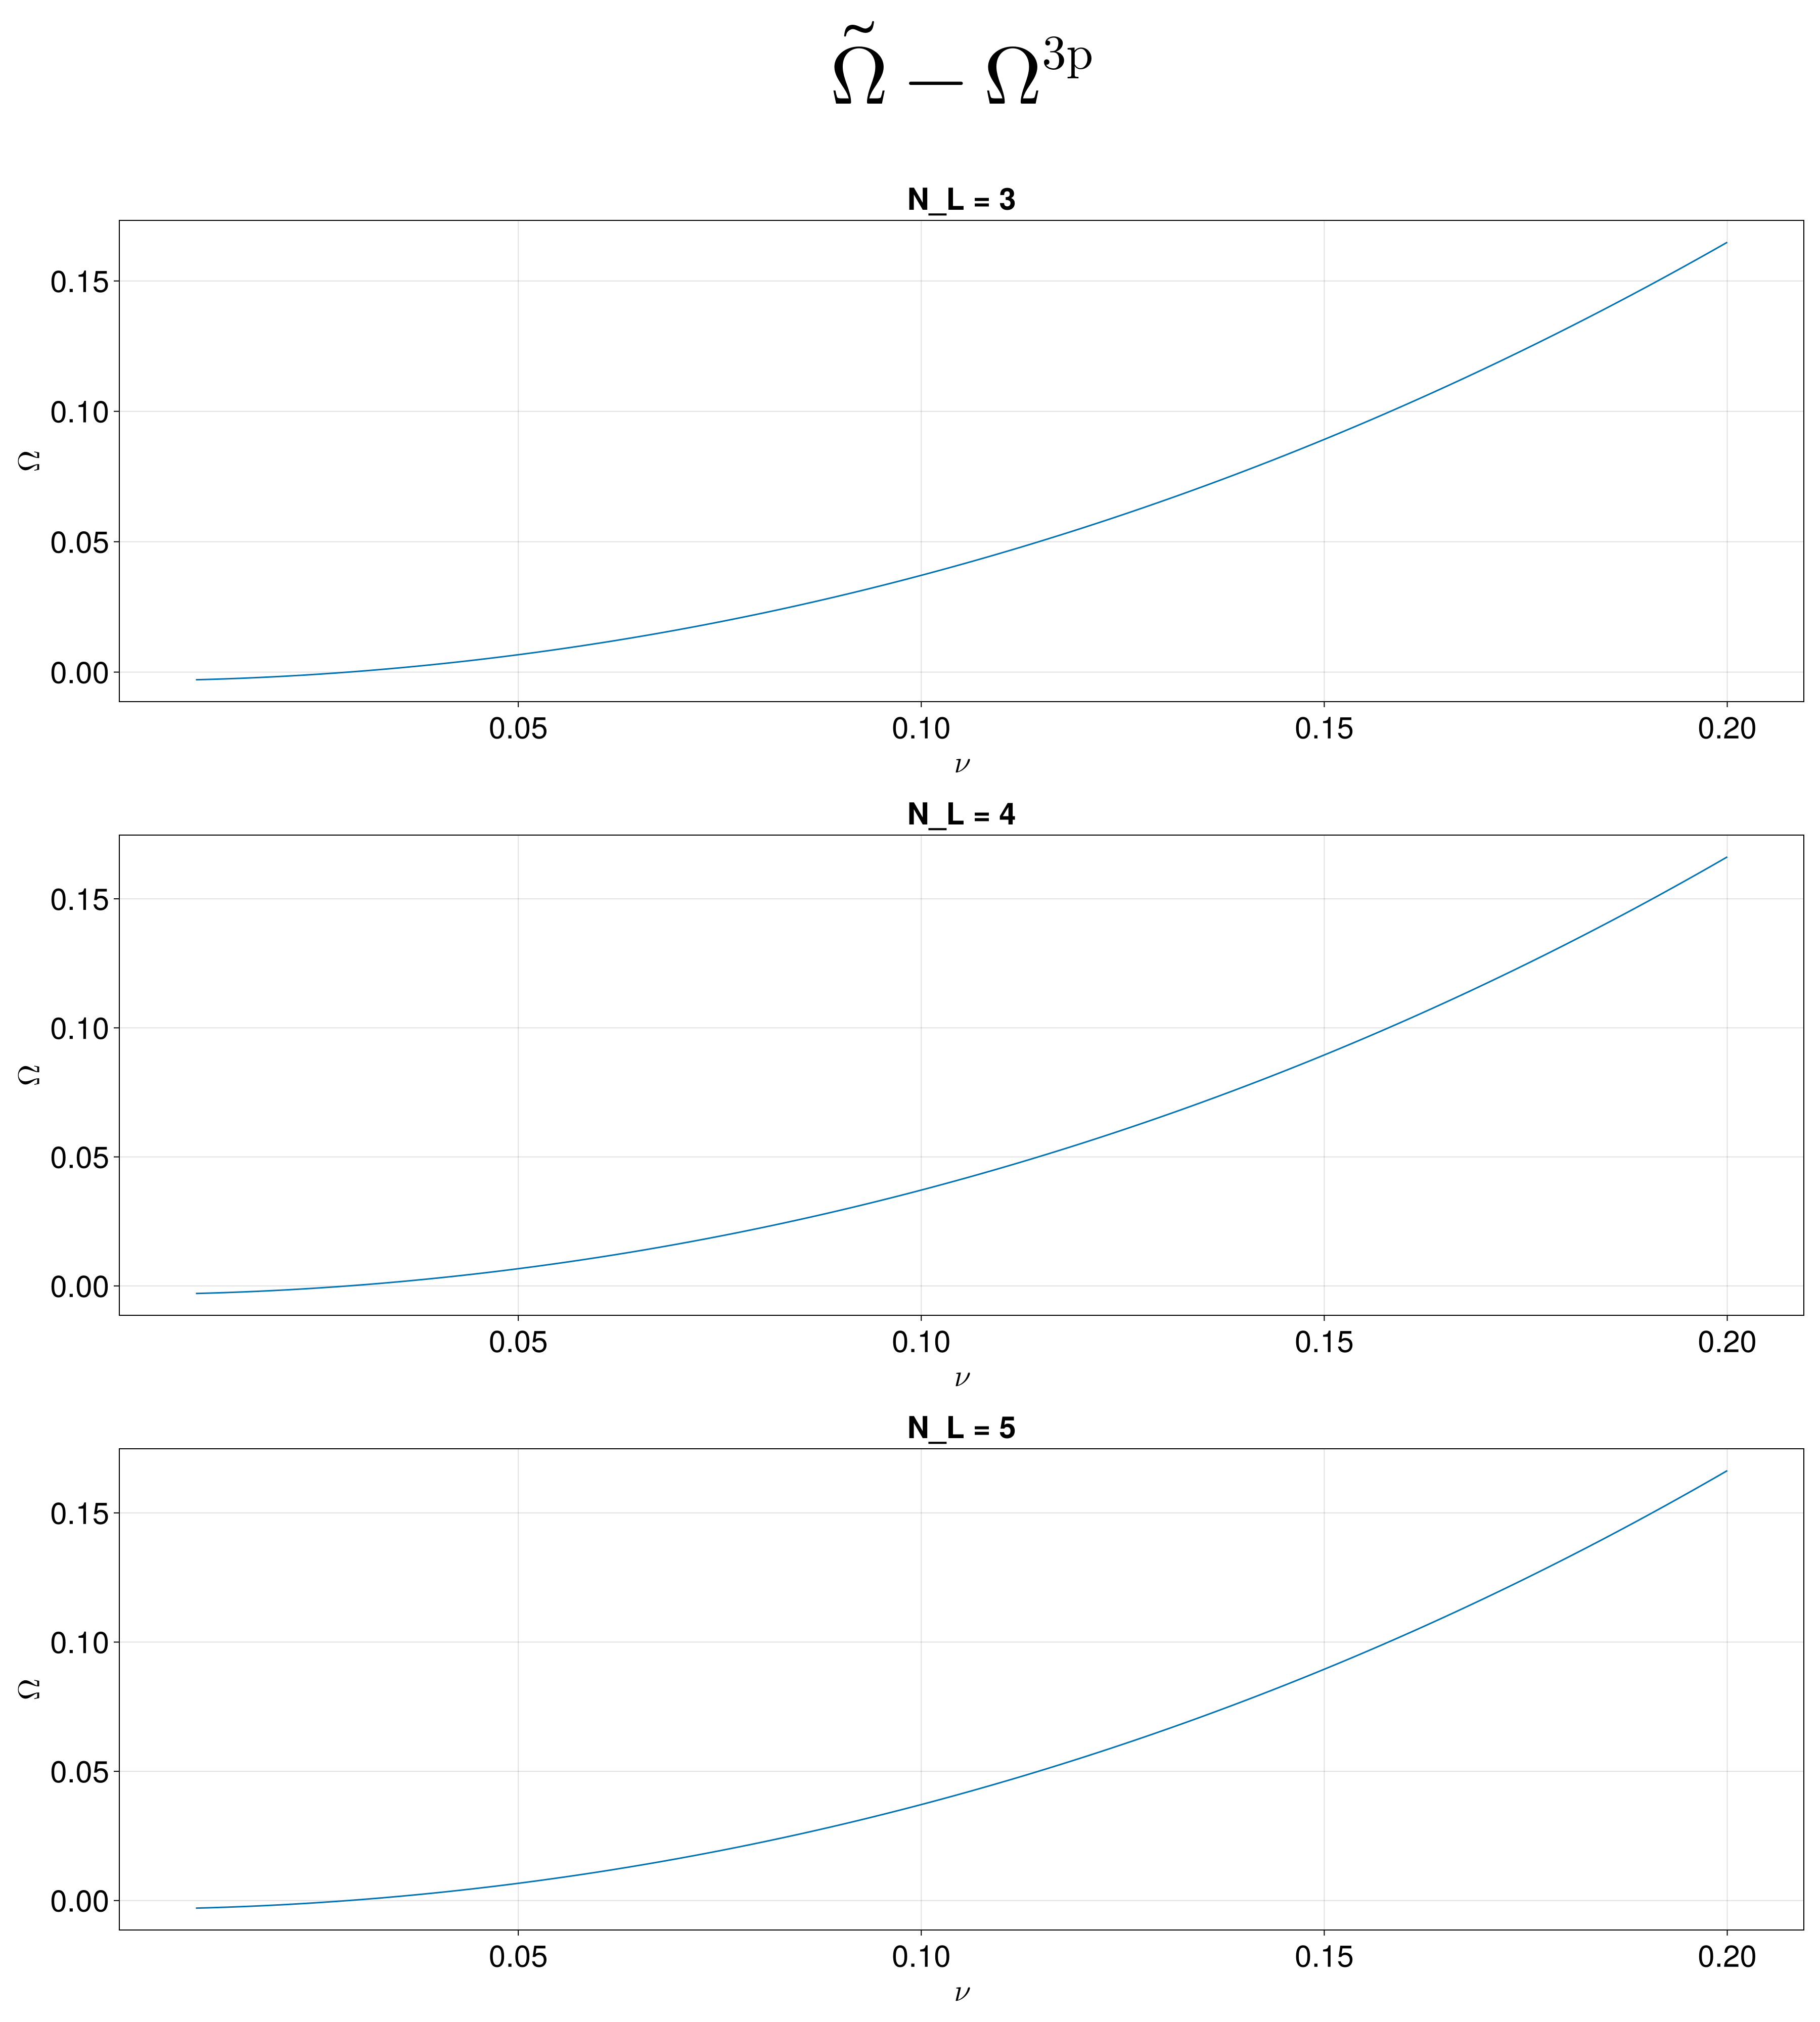

In [132]:
rmg_diff_check(NL_list, mbz_kappa, vF, w, pd, 0.01, 0.2)

In [79]:
function rmg_ratio_check_vF(Nl_list, m_kappa, nu, w, pd, vF_llm, vF_ulm)
    vF_pts = 10^2
    vF_list = range(vF_llm, vF_ulm, vF_pts)
    ratio = Array{Float64}(undef, vF_pts)
    spacing = 10^(-2) * (w / 2 / pd)

    P = Figure(size=(1800, 2000), fontsize=30)

    for j in 1:length(Nl_list)
        Nl = Nl_list[j]
        for i in 1:vF_pts
            vF = vF_list[i]
            delta = rmg_delta_all(m_kappa, nu, Nl)
            alpha = rmg_alpha_all(m_kappa, nu, Nl)
            grid = reshape([10^(-16), 10^(-16)], (1, 2))
            c1 = bc_no_spinors(grid, spacing, vF, delta, alpha)[1]
            c2 = rmg_patch_bc(grid, spacing, Nl, nu, m_kappa, vF, delta, alpha)[1]
            
            ratio[i] = c1/c2
        end
        ax1 = Axis(P[j, 1], title = "N_L = "*string(Nl), xlabel = L"v_F", ylabel = L"\Omega")
        lines!(ax1, vF_list, ratio, label = "3-Patch")
        # P[j, 2] = Legend(P, ax1, framevisible = true)
    end
    axs1 = Axis(P[:, 1], title = L"\frac{\tilde{\Omega}}{\Omega^{\text{3p}}}", titlegap = 100, titlesize = 80)
    hidedecorations!(axs1, label = false)
    hidespines!(axs1)

    P
end

rmg_ratio_check_vF (generic function with 1 method)

In [8]:
nu = 0.05

0.05

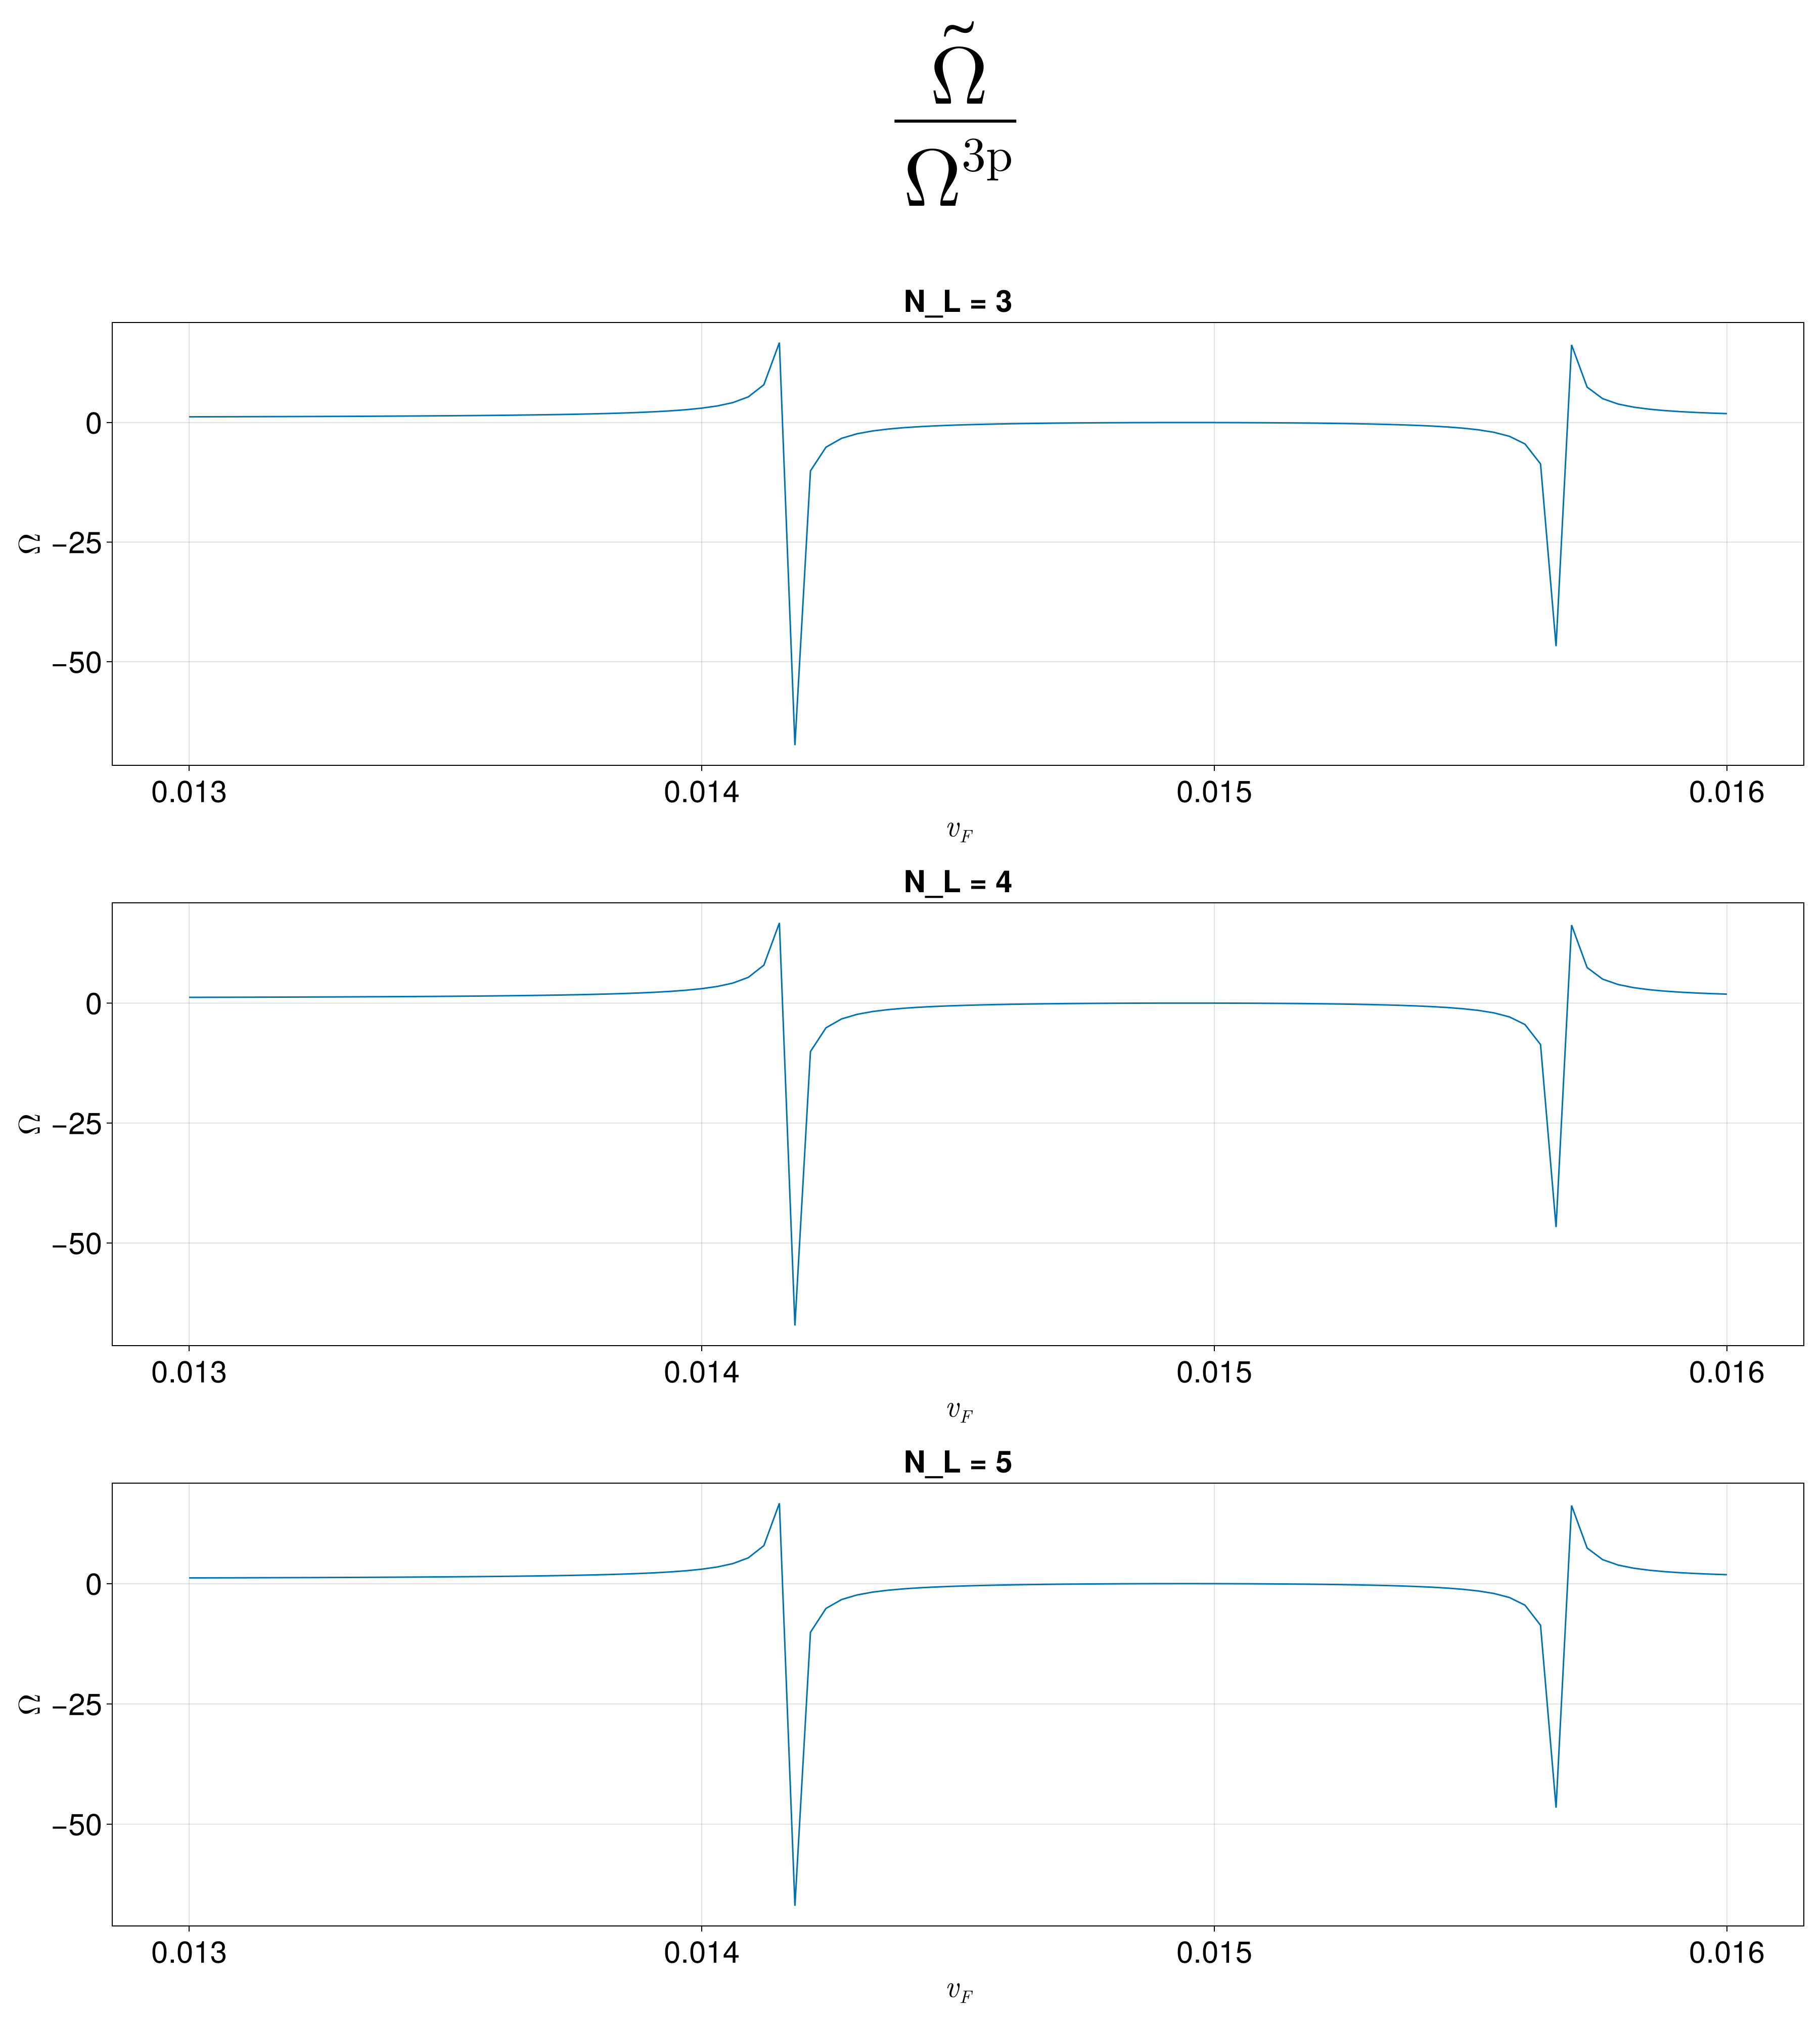

In [118]:
rmg_ratio_check_vF(NL_list, mbz_kappa, nu, w, pd, 0.013, 0.016)

Spikes can be attributed to roots in $\Omega^\text{3p}$.

In [5]:
function rmg_rel_error_check_vF(Nl_list, m_kappa, nu, w, pd, vF_llm, vF_ulm)
    vF_pts = 10^2
    vF_list = range(vF_llm, vF_ulm, vF_pts)
    ratio = Array{Float64}(undef, vF_pts)
    cross = Array{Float64}(undef, vF_pts)
    spacing = 10^(-2) * (w / 2 / pd)

    P = Figure(size=(1800, 2000), fontsize=30)

    for j in 1:length(Nl_list)
        Nl = Nl_list[j]
        for i in 1:vF_pts
            vF = vF_list[i]
            delta = rmg_delta_all(m_kappa, nu, Nl)
            alpha = rmg_alpha_all(m_kappa, nu, Nl)
            grid = reshape([10^(-16), 10^(-16)], (1, 2))
            c1 = bc_no_spinors(grid, spacing, vF, delta, alpha)[1]
            c2 = rmg_patch_bc(grid, spacing, Nl, nu, m_kappa, vF, delta, alpha)[1]

            cross[i] = c1
            
            ratio[i] = log10(abs((c1 - c2)/c2))
        end
        ax1 = Axis(P[j, 1], title = "N_L = "*string(Nl), xlabel = L"v_F", ylabel = L"\Omega")
        lines!(ax1, vF_list, ratio, label = "error")
       #  lines!(ax1, vF_list, cross, label = "cross")
        P[j, 2] = Legend(P, ax1, framevisible = true)
    end
    axs1 = Axis(P[:, 1], title = L"\log_{10} (\delta \tilde{\Omega})", titlegap = 100, titlesize = 80)
    hidedecorations!(axs1, label = false)
    hidespines!(axs1)

    P
end

rmg_rel_error_check_vF (generic function with 1 method)

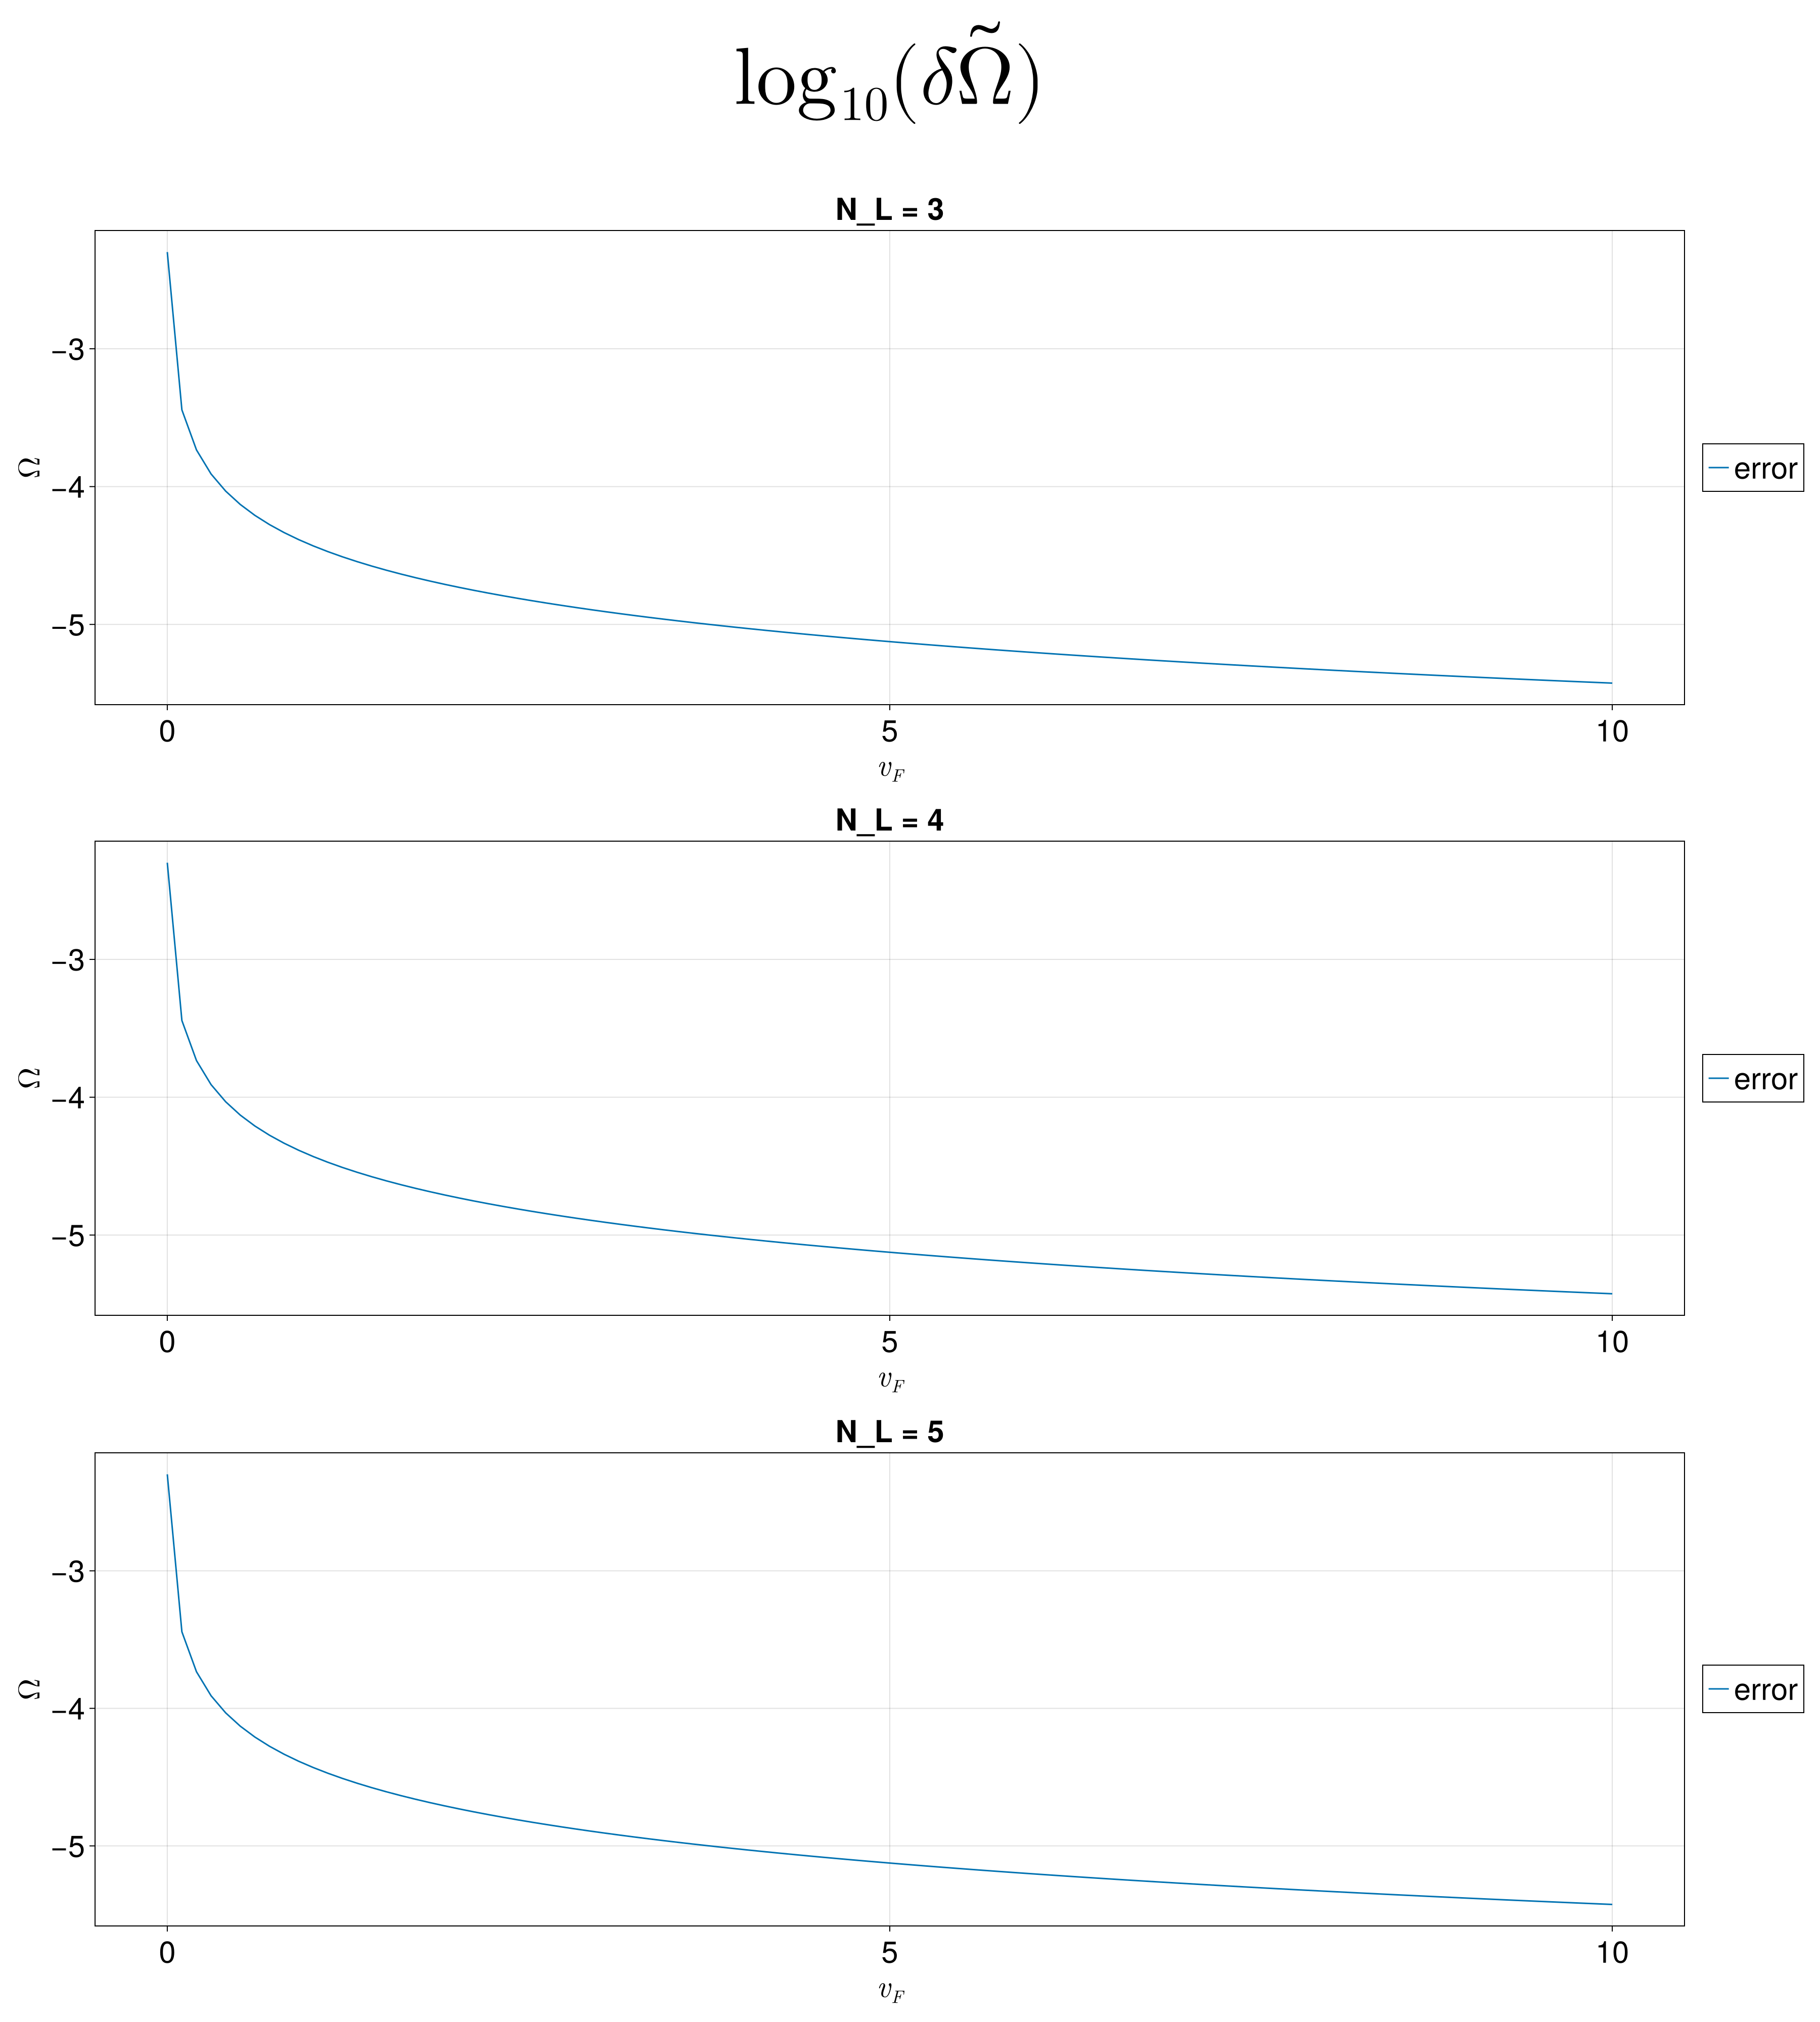

In [9]:
rmg_rel_error_check_vF(NL_list, mbz_kappa, nu, w, pd, 0, 10)

In [162]:
function rmg_diff_check_vF(Nl_list, m_kappa, nu, w, pd, vF_llm, vF_ulm)
    vF_pts = 10^2
    vF_list = range(vF_llm, vF_ulm, vF_pts)
    ratio = Array{Float64}(undef, vF_pts)
    cross = Array{Float64}(undef, vF_pts)
    spacing = 10^(-2) * (w / 2 / pd)

    P = Figure(size=(1800, 2000), fontsize=30)

    for j in 1:length(Nl_list)
        Nl = Nl_list[j]
        for i in 1:vF_pts
            vF = vF_list[i]
            delta = rmg_delta_all(m_kappa, nu, Nl)
            alpha = rmg_alpha_all(m_kappa, nu, Nl)
            grid = reshape([10^(-16), 10^(-16)], (1, 2))
            c1 = bc_no_spinors(grid, spacing, vF, delta, alpha)[1]
            c2 = rmg_patch_bc(grid, spacing, Nl, nu, m_kappa, vF, delta, alpha)[1]

            cross[i] = c1
            
            ratio[i] = c1 - c2
        end
        ax1 = Axis(P[j, 1], title = "N_L = "*string(Nl), xlabel = L"v_F", ylabel = L"\Omega")
        lines!(ax1, vF_list, ratio, label = "error")
       #  lines!(ax1, vF_list, cross, label = "cross")
        P[j, 2] = Legend(P, ax1, framevisible = true)
    end
    axs1 = Axis(P[:, 1], title = L"\tilde{\Omega} - \Omega^{\text{3p}}", titlegap = 100, titlesize = 80)
    hidedecorations!(axs1, label = false)
    hidespines!(axs1)

    P
end

rmg_diff_check_vF (generic function with 1 method)

In [163]:
nu = 0.01

0.01

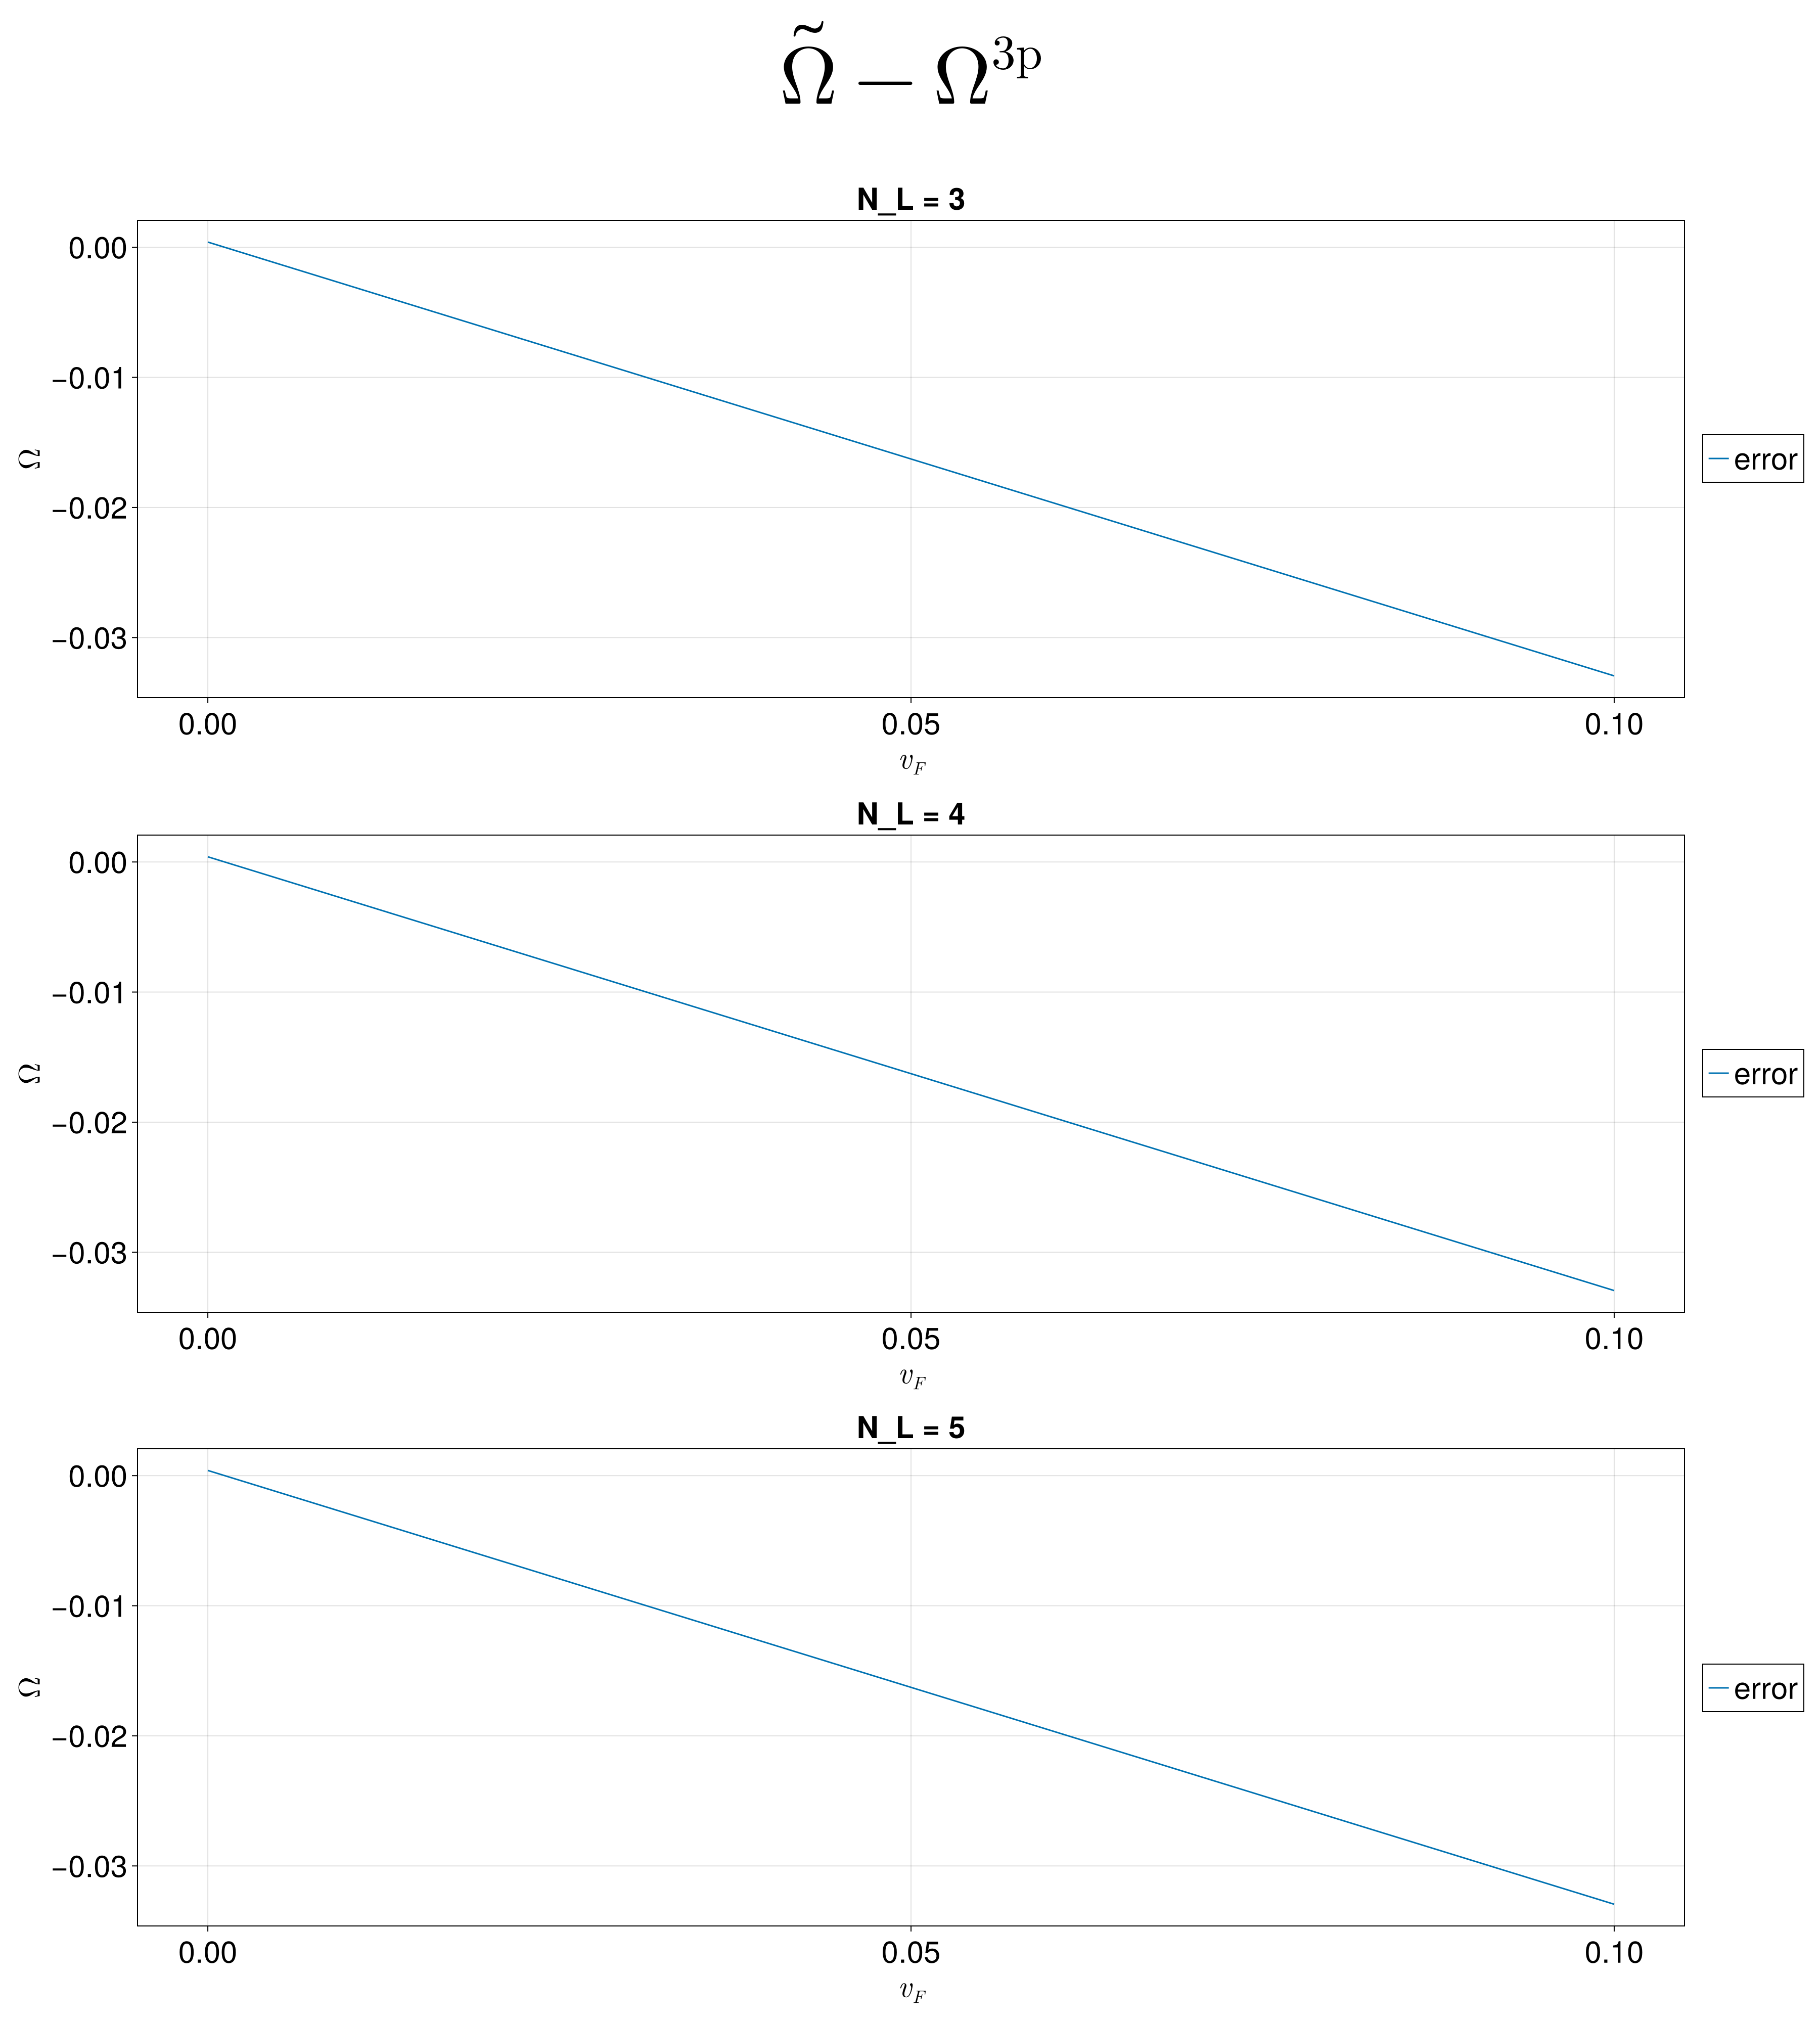

In [164]:
rmg_diff_check_vF(NL_list, mbz_kappa, nu, w, pd, 0, 0.1)